In [335]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random
import time
from skimage.metrics import structural_similarity, mean_squared_error

In [336]:
cells_path = 'cl'
background_path = 'bg'

In [337]:
for filename in os.listdir(background_path):
    img=Image.open('bg/' + filename)
    rimg = img.resize((32,32))
    rimg.save('bg/' + filename)
for filename in os.listdir(cells_path):
    img=Image.open('cl/' + filename)
    rimg = img.resize((64,64))
    rimg.save('cl/' + filename)

In [338]:
import cv2
import numpy as np
import random
import os
from glob import glob
import matplotlib.pyplot as plt

def bg_create():
    bg = np.zeros((512,512,3), dtype=np.uint8)
    patch = glob(os.path.join('bg/',"*.png"))
    for i in range(512//32):
        for j in range(512//32):
            p = cv2.imread(random.choice(patch),cv2.IMREAD_GRAYSCALE)
            p = cv2.cvtColor(p, cv2.COLOR_GRAY2BGR)
            bg[i*32:(i+1)*32,j*32:(j+1)*32] = p
    return bg
def cell_create(bg):
    cells = glob(os.path.join('cl/',"*.png"))
    cell = cv2.imread(random.choice(cells),cv2.IMREAD_GRAYSCALE)
    cell = cv2.cvtColor(cell, cv2.COLOR_GRAY2BGR)
    mask = 255 * np.ones(cell.shape, dtype=np.uint8)
    place = (random.randint(0, 512 - 64) + 64 // 2, random.randint(0, 512 - 64) + 64 // 2)
    img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
    return img
def gauss(img):
    mean = 0
    stddev = 100
    noise_gauss = np.zeros(img.shape, np.uint8)
    cv2.randn(noise_gauss, mean, stddev)
    img = cv2.add(img,noise_gauss)
    return img
def const(img):
    img = cv2.add(img, 10)
    return img
def generate():
    while 1:
        img = bg_create()
        for i in range(random.randint(1,10)):
            img = cell_create(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gs = gauss(img)
        ct = const(img)
        yield img, gs, ct

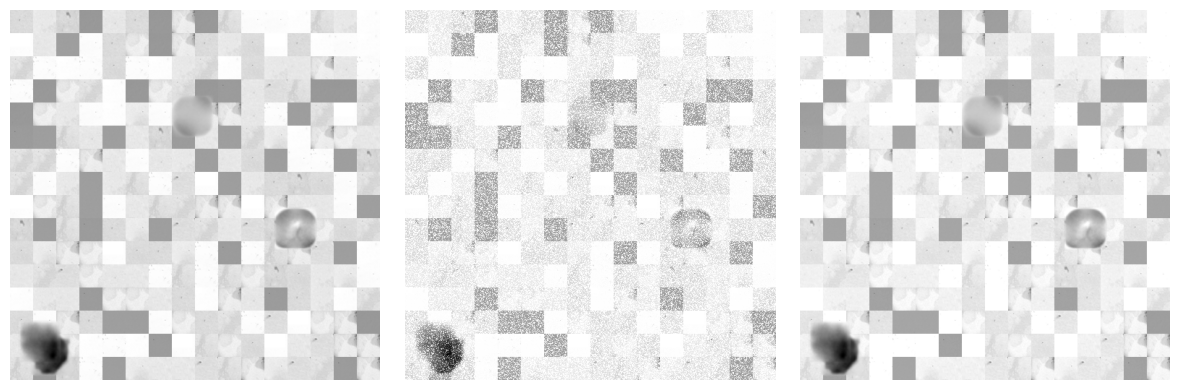

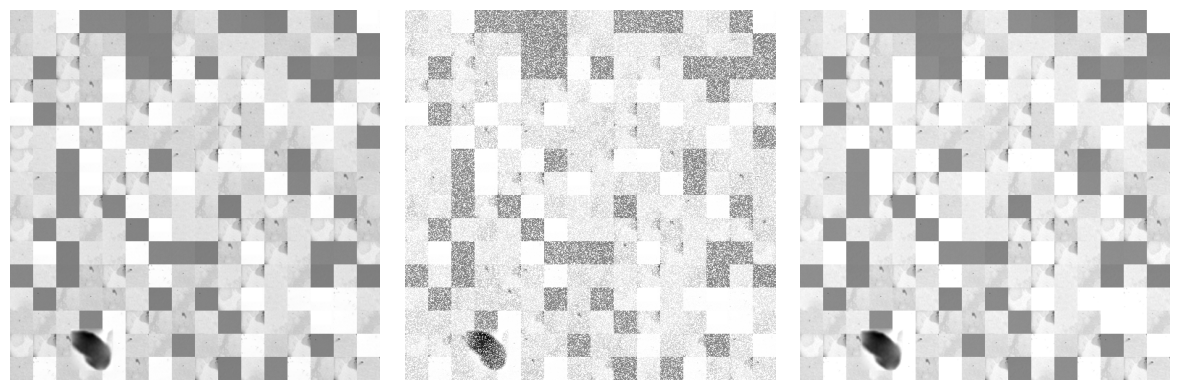

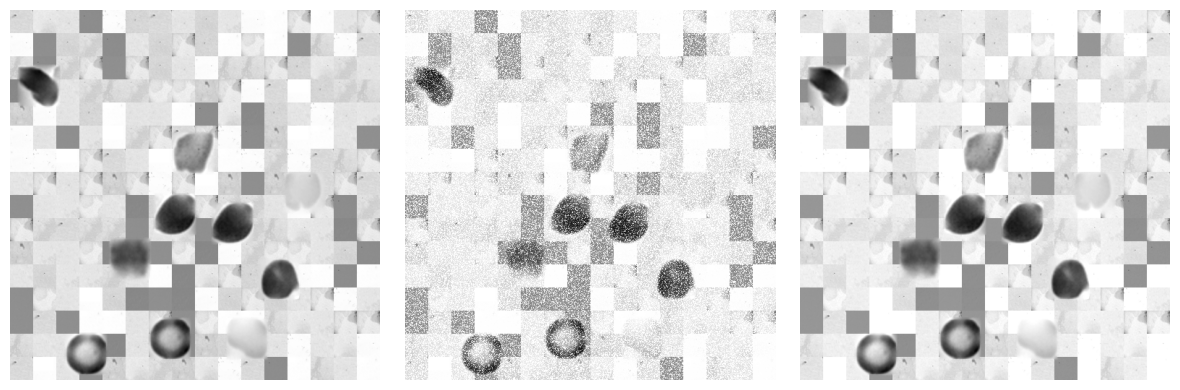

In [342]:
gen = generate() 

mse_m = [[0,0,0],[0,0,0]]
ssim_m = [[0,0,0],[0,0,0]]
time_m = [[0,0,0],[0,0,0]]

mse_g = [[0,0,0],[0,0,0]]
ssim_g = [[0,0,0],[0,0,0]]
time_g = [[0,0,0],[0,0,0]]

mse_b = [[0,0,0],[0,0,0]]
ssim_b = [[0,0,0],[0,0,0]]
time_b = [[0,0,0],[0,0,0]]

mse_n = [[0,0,0],[0,0,0]]
ssim_n = [[0,0,0],[0,0,0]]
time_n = [[0,0,0],[0,0,0]]

for i in range(3):
    img, gs, ct = next(gen)
    plt.figure(figsize=(12, 4))
    plt.subplot(1,3,1)
    plt.imshow(img, cmap = 'gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.imshow(gs, cmap = 'gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.imshow(ct, cmap = 'gray')
    plt.axis('off')
    plt.tight_layout()

    start_time = time.time()
    image_gauss = cv2.medianBlur(gs, 3)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_m[0][i] = mse_gauss_median
    ssim_m[0][i] = ssim_gauss_median
    time_m[0][i] = end_time - start_time
    start_time = time.time()
    image_gauss = cv2.medianBlur(ct, 3)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_m[1][i] = mse_gauss_median
    ssim_m[1][i] = ssim_gauss_median
    time_m[1][i] = end_time - start_time
    
    start_time = time.time()
    image_gauss = cv2.GaussianBlur(gs,(5,5),0)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_g[0][i] = mse_gauss_median
    ssim_g[0][i] = ssim_gauss_median
    time_g[0][i] = end_time - start_time
    start_time = time.time()
    image_gauss = cv2.GaussianBlur(ct,(5,5),0)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_g[1][i] = mse_gauss_median
    ssim_g[1][i] = ssim_gauss_median
    time_g[1][i] = end_time - start_time

    start_time = time.time()
    image_gauss = cv2.bilateralFilter(gs,9,75,75)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_b[0][i] = mse_gauss_median
    ssim_b[0][i] = ssim_gauss_median
    time_b[0][i] = end_time - start_time
    start_time = time.time()
    image_gauss = cv2.bilateralFilter(ct,9,75,75)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_b[1][i] = mse_gauss_median
    ssim_b[1][i] = ssim_gauss_median
    time_b[1][i] = end_time - start_time

    start_time = time.time()
    image_gauss = cv2.fastNlMeansDenoising(gs, 10, 7, 21)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_n[0][i] = mse_gauss_median
    ssim_n[0][i] = ssim_gauss_median
    time_n[0][i] = end_time - start_time
    start_time = time.time()
    image_gauss = cv2.fastNlMeansDenoising(ct, 10, 7, 21)
    end_time = time.time()
    mse_gauss_median = mean_squared_error(img, image_gauss)
    (ssim_gauss_median, diff) = structural_similarity(img,  image_gauss, full=True)
    mse_n[1][i] = mse_gauss_median
    ssim_n[1][i] = ssim_gauss_median
    time_n[1][i] = end_time - start_time

In [343]:
print(f"Median - MSE = {sum(mse_m[0])/3}, SSIM = {sum(ssim_m[0])/3}, TIME = {sum(time_m[0])/3}")
print(f"Gauss - MSE = {sum(mse_g[0])/3}, SSIM = {sum(ssim_g[0])/3}, TIME = {sum(time_g[0])/3}")
print(f"Bilateral - MSE = {sum(mse_b[0])/3}, SSIM = {sum(ssim_b[0])/3}, TIME = {sum(time_b[0])/3}")
print(f"NLMeans - MSE = {sum(mse_n[0])/3}, SSIM = {sum(ssim_n[0])/3}, TIME = {sum(time_n[0])/3}")

Median - MSE = 395.86613337198895, SSIM = 0.4866959332276281, TIME = 0.00031121571858723957
Gauss - MSE = 382.6676826477051, SSIM = 0.7488585846915069, TIME = 0.00017793973286946615
Bilateral - MSE = 382.51990127563477, SSIM = 0.7440625400935631, TIME = 0.0030899842580159507
NLMeans - MSE = 767.7136179606119, SSIM = 0.46023882118888126, TIME = 0.3981784184773763


In [344]:
print(f"Median - MSE = {sum(mse_m[1])/3}, SSIM = {sum(ssim_m[1])/3}, TIME = {sum(time_m[1])/3}")
print(f"Gauss - MSE = {sum(mse_g[1])/3}, SSIM = {sum(ssim_g[1])/3}, TIME = {sum(time_g[1])/3}")
print(f"Bilateral - MSE = {sum(mse_b[1])/3}, SSIM = {sum(ssim_b[1])/3}, TIME = {sum(time_b[1])/3}")
print(f"NLMeans - MSE = {sum(mse_n[1])/3}, SSIM = {sum(ssim_n[1])/3}, TIME = {sum(time_n[1])/3}")

Median - MSE = 90.38932927449544, SSIM = 0.9629722033711013, TIME = 0.0003123283386230469
Gauss - MSE = 110.29472732543945, SSIM = 0.9255492699457107, TIME = 0.0001808007558186849
Bilateral - MSE = 126.3101183573405, SSIM = 0.8665757318041042, TIME = 0.0032892227172851562
NLMeans - MSE = 98.95418167114258, SSIM = 0.9075689000687684, TIME = 0.39899643262227374
